# Forecasting Telecom Traffic Volume Per Hour

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [5]:
sns.set(style="whitegrid")

# Load Data
PROCESSED_PATH = "../data/processed/parquet/"
df = pd.read_parquet(PROCESSED_PATH + "traffic_volume.parquet")

# 1️⃣ Preprocessing for Prophet

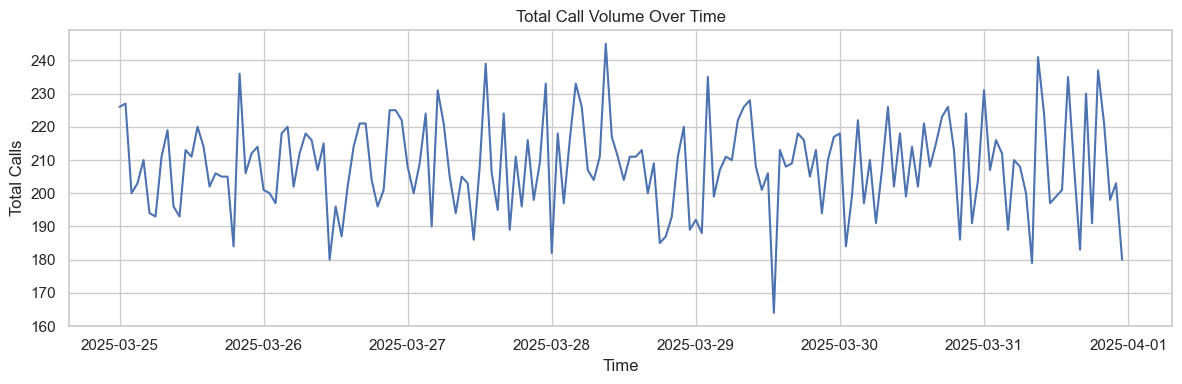

In [6]:
# Aggregate across all towers for simplicity
agg_df = df.groupby("hour")["total_calls"].sum().reset_index()
agg_df.columns = ["ds", "y"]
agg_df["ds"] = pd.to_datetime(agg_df["ds"])

# Plot original time series
plt.figure(figsize=(12, 4))
plt.plot(agg_df["ds"], agg_df["y"])
plt.title("Total Call Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Total Calls")
plt.tight_layout()
plt.show()

# 2️⃣ Train-Test Split

In [7]:
split_idx = int(len(agg_df) * 0.85)
df_train = agg_df.iloc[:split_idx]
df_test = agg_df.iloc[split_idx:]

# 3️⃣ Train Prophet Model

In [8]:
model = Prophet()
model.fit(df_train)

17:55:41 - cmdstanpy - INFO - Chain [1] start processing
17:55:41 - cmdstanpy - INFO - Chain [1] done processing


# 4️⃣ Forecast Future

In [9]:
future = model.make_future_dataframe(periods=len(df_test), freq='H')
forecast = model.predict(future)

d:\Development\Project_Repositories\telecom-intelligent-ml-platform\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


# 5️⃣ Evaluation

In [12]:
pred = forecast.set_index("ds").loc[df_test["ds"]]["yhat"]
true = df_test.set_index("ds")["y"]

mae = mean_absolute_error(true, pred)
mse = mean_squared_error(true, pred)
rmse = root_mean_squared_error(true, pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

MAE: 15.15, MSE: 345.48, RMSE: 18.59


# 6️⃣ Plot Forecast

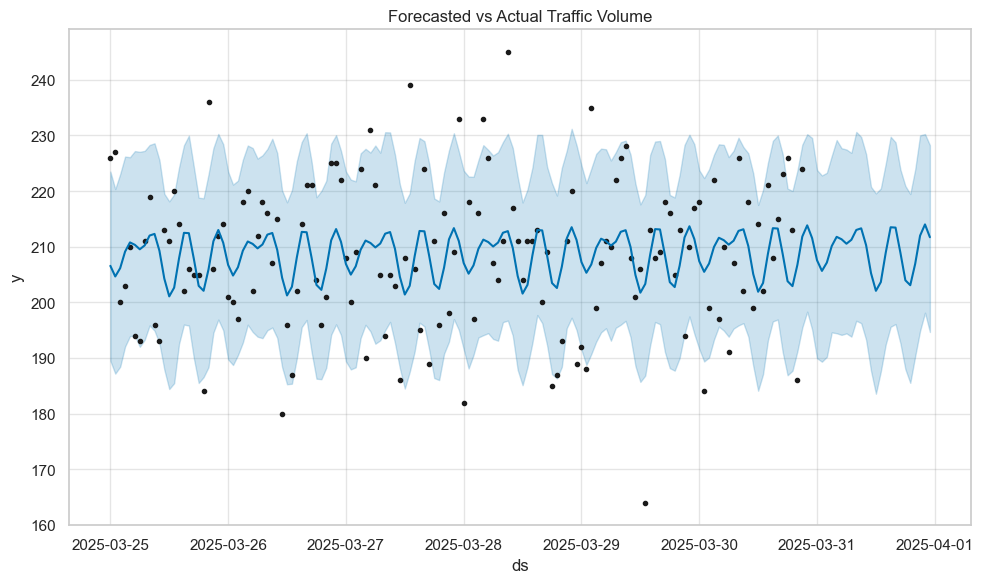

In [13]:
fig1 = model.plot(forecast)
plt.title("Forecasted vs Actual Traffic Volume")
plt.tight_layout()
plt.show()

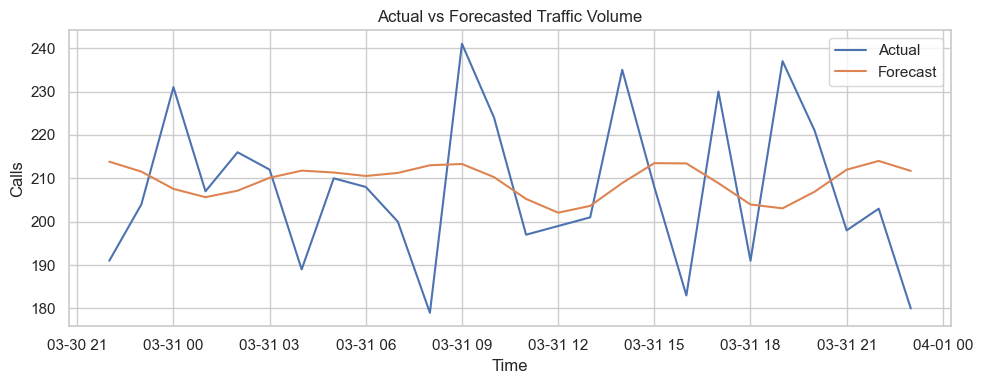

In [14]:
# Overlay forecast vs. test
plt.figure(figsize=(10, 4))
plt.plot(true.index, true.values, label="Actual")
plt.plot(pred.index, pred.values, label="Forecast")
plt.title("Actual vs Forecasted Traffic Volume")
plt.xlabel("Time")
plt.ylabel("Calls")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
import joblib

joblib.dump(model, "../models/forecast_model.pkl")

['../models/forecast_model.pkl']